In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats as stats

In [3]:
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})
df.head()

,beta,exponential,normal_p,normal_l
0,53.853607,9.352032,11.251746,14.408425
1,57.377071,17.228723,10.539846,10.511907
2,42.526629,6.241408,5.614790,26.047225
3,58.438542,4.875635,11.024215,14.502627
4,50.361977,0.112124,8.451650,15.346025


In [6]:
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,53.853607,9.352032,11.251746,14.408425,20.670510
1,57.377071,17.228723,10.539846,10.511907,14.951519
2,42.526629,6.241408,5.614790,26.047225,21.572346
3,58.438542,4.875635,11.024215,14.502627,16.209653
4,50.361977,0.112124,8.451650,15.346025,26.850181


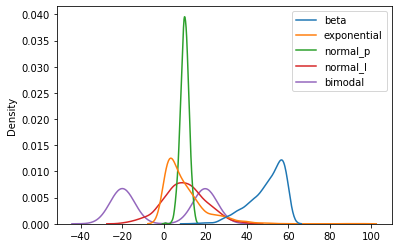

In [10]:
sns.kdeplot(data = df);

In [11]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.849789,10.160819,10.082483,9.975132,0.035438
std,8.399857,10.173346,2.007784,10.158123,20.241048
min,14.455273,0.003803,0.858060,-19.796097,-29.009872
25%,44.840450,2.924426,8.767549,3.567182,-20.051269
50%,51.845518,7.067347,10.146855,9.635544,-0.073828
75%,56.797829,13.845574,11.430605,16.433933,20.041064
max,59.992139,94.829588,15.629528,40.107882,31.575348


<AxesSubplot:ylabel='Density'>

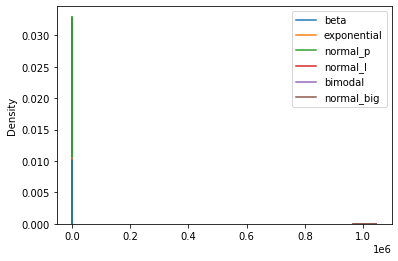

In [12]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<AxesSubplot:>

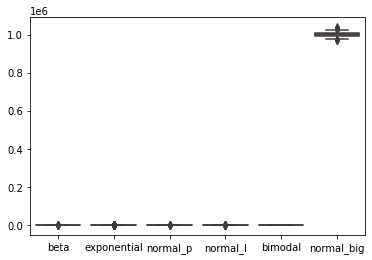

In [14]:
sns.boxplot(data = df)

### ==> Dữ liệu normal big khá chênh lệch so với các dữ liệu còn lại, làm ảnh hưởng đến kết quả việc học máy

## 1. Z-score

In [16]:
s_scalar = StandardScaler()
# scale z-score data
df_s = s_scalar.fit_transform(df)

list_columns = df.columns
df_s = pd.DataFrame(df_s, columns= list_columns)
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.476892,-0.079540,0.582656,0.436647,1.019977,0.468000
1,0.896569,0.695095,0.227909,0.052868,0.737291,-1.268199
2,-0.872256,-0.385455,-2.226300,1.582983,1.064554,0.014252
3,1.023000,-0.519773,0.469275,0.445925,0.799480,-2.392674
4,0.061006,-0.988242,-0.812662,0.528993,1.325433,0.902271


In [59]:
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-2.575717e-17,1.374456e-16,1.243450e-16,-9.769963e-17,1.705303e-16,-7.750245e-15
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-4.215813e+00,-9.988944e-01,-4.596629e+00,-2.932247e+00,-1.435689e+00,-2.843344e+00
25%,-5.966585e-01,-7.116650e-01,-6.552460e-01,-6.311359e-01,-9.928714e-01,-6.531937e-01
50%,2.377097e-01,-3.042284e-01,3.207709e-02,-3.344688e-02,-5.400947e-03,2.560564e-03
75%,8.275755e-01,3.623782e-01,6.717837e-01,6.361444e-01,9.888636e-01,6.313946e-01
max,1.208047e+00,8.326772e+00,2.764152e+00,2.967854e+00,1.558995e+00,3.796434e+00


<AxesSubplot:ylabel='Density'>

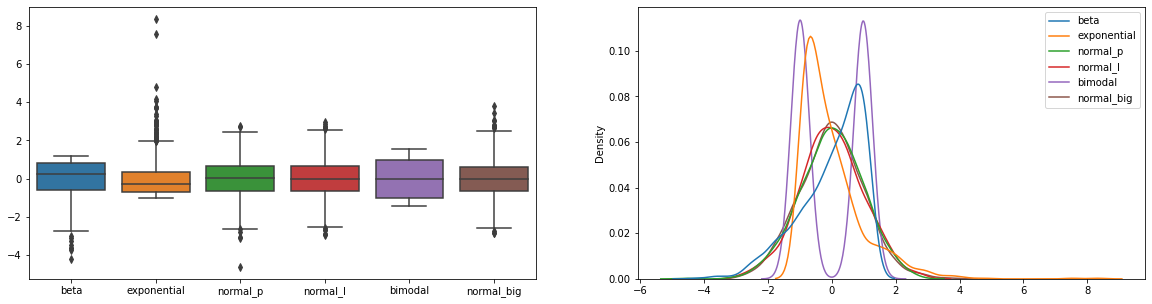

In [44]:
fig ,ax = plt.subplots(1,2)
plt.rcParams['figure.figsize'] = 25, 5
sns.boxplot(data = df_s, ax = ax[0])
sns.kdeplot(data = df_s , ax = ax[1])

### Good

## 2. Min-max Scaling

In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_m = scaler.fit_transform(df)
df_m = pd.DataFrame(df_m, columns= list_columns)
df_m.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.865196,0.098583,0.703633,0.570989,0.820008,0.498713
1,0.942572,0.181648,0.655438,0.505943,0.725612,0.237228
2,0.616453,0.065780,0.322021,0.765280,0.834894,0.430375
3,0.965883,0.051377,0.688229,0.572562,0.746379,0.067874
4,0.788519,0.001142,0.514071,0.586641,0.922008,0.564117


In [58]:
df_m.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.777272,0.107112,0.624476,0.496982,0.479412,0.428229
std,0.184463,0.107285,0.135923,0.169573,0.334092,0.150683
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.667265,0.030800,0.535457,0.390012,0.147868,0.329853
50%,0.821098,0.074490,0.628834,0.491314,0.477609,0.428614
75%,0.929852,0.145971,0.715741,0.604802,0.809619,0.523321
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:ylabel='Density'>

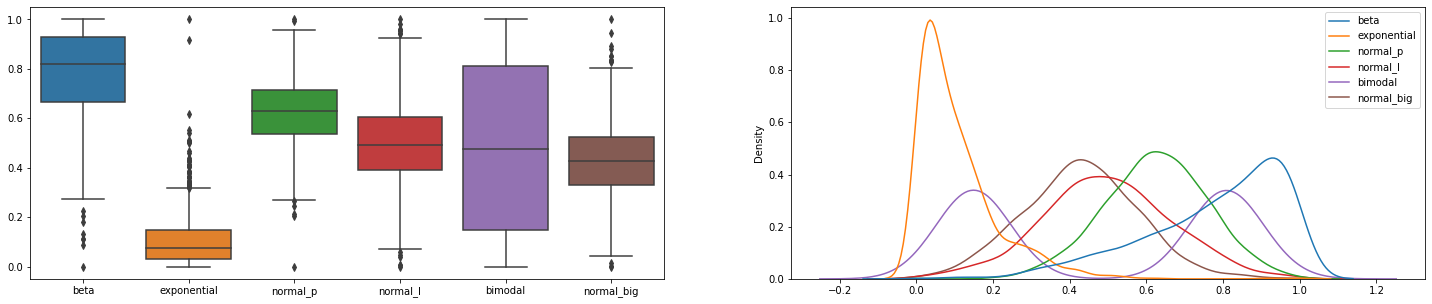

In [51]:
fig ,ax = plt.subplots(1,2)
plt.rcParams['figure.figsize'] = 25, 5
sns.boxplot(data = df_m, ax = ax[0])
sns.kdeplot(data = df_m , ax = ax[1])

## 3. Robust Scaling

In [54]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

df_r = scaler.fit_transform(df)
df_r = pd.DataFrame(df_r,columns=list_columns)
df_r.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.167937,0.209198,0.414896,0.370947,0.517414,0.362325
1,0.462606,0.930431,0.147571,0.068111,0.374769,-0.989235
2,-0.779342,-0.075627,-1.701828,1.275511,0.539908,0.009102
3,0.551377,-0.200685,0.329456,0.378268,0.406150,-1.864593
4,-0.124069,-0.636858,-0.636564,0.443817,0.671550,0.700388


In [57]:
df_r.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1.000000e+03,1000.000000,1000.000000,1.000000e+03,1000.000000,1.000000e+03
mean,-1.669035e-01,0.283255,-0.024172,2.639264e-02,0.002725,-1.993295e-03
std,7.024831e-01,0.931527,0.753940,7.894863e-01,0.504861,7.788491e-01
min,-3.126960e+00,-0.646777,-3.488020,-2.287418e+00,-0.721735,-2.215421e+00
25%,-5.858364e-01,-0.379348,-0.517941,-4.716313e-01,-0.498286,-5.104782e-01
50%,2.970985e-16,0.000000,0.000000,-6.906368e-17,0.000000,-4.589861e-15
75%,4.141636e-01,0.620652,0.482059,5.283687e-01,0.501714,4.895218e-01
max,6.813049e-01,8.035990,2.058790,2.368301e+00,0.789407,2.953377e+00


<AxesSubplot:ylabel='Density'>

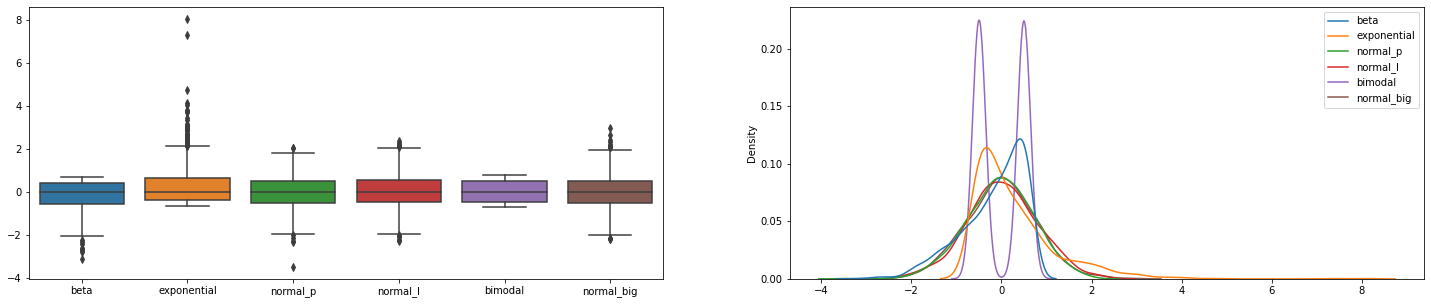

In [56]:
fig ,ax = plt.subplots(1,2)
plt.rcParams['figure.figsize'] = 20, 5
sns.boxplot(data = df_r, ax = ax[0])
sns.kdeplot(data = df_r , ax = ax[1])

<AxesSubplot:ylabel='Density'>

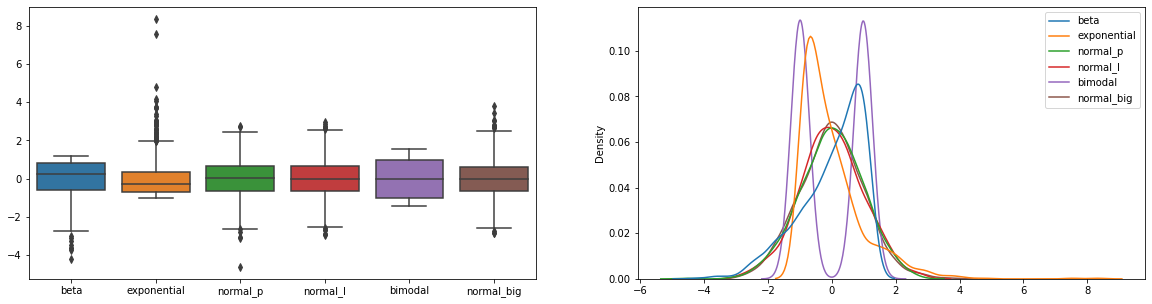

In [61]:
# Tiếp tục StandardScale()
scaler = StandardScaler()
df2_s = scaler.fit_transform(df_r)

df2_s = pd.DataFrame(df2_s, columns=list_columns)
fig ,ax = plt.subplots(1,2)
plt.rcParams['figure.figsize'] = 20, 5
sns.boxplot(data = df2_s, ax = ax[0])
sns.kdeplot(data = df2_s , ax = ax[1])